# Question 1(1)
Leapfrog method implementation

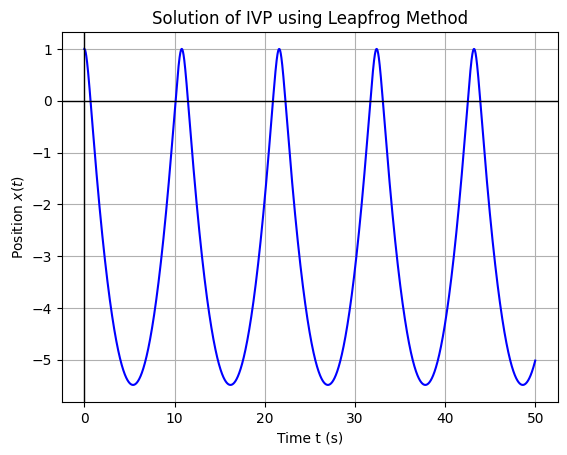

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f_x(t,x,v):
    return v

def f_v(t,x,v):
    return v**2-(x+5)

def Leapfrog(funcs,t0,u0,tn,h):
    T=np.arange(t0,tn+h,h)        #This is a fixed step size array
    R=np.zeros((len(T),len(u0)))
    R_half=np.zeros((len(T),len(u0))) 
    R[0]=u0
    R_half[0]=u0+(h/2)*np.array([f(t0,*u0) for f in funcs])    #Euler half-step for position and velocity initialization   

    for i in range(len(T)-1):
        t,u_half,u=T[i],R_half[i],R[i]
        R[i+1]=u+h*np.array([f(t+h/2,*u_half) for f in funcs])
        R_half[i+1]=u_half+h*np.array([f(t+h,*R[i+1]) for f in funcs])

    return T,R[:,0],R[:,1]  

t0,tn,h=0,50,0.001
x0,v0=1,0

functions=[f_x,f_v]
T,X,V=Leapfrog(functions,t0,[x0,v0],tn,h)

plt.plot(T,X,'b-')
plt.xlabel('Time t (s)')
plt.ylabel(r'Position $x(t)$')
plt.title('Solution of IVP using Leapfrog Method')
plt.axhline(color='black',linewidth=1)
plt.axvline(color='black',linewidth=1)
plt.grid()
plt.show()

# Question 1(2)
Verlet method implementation

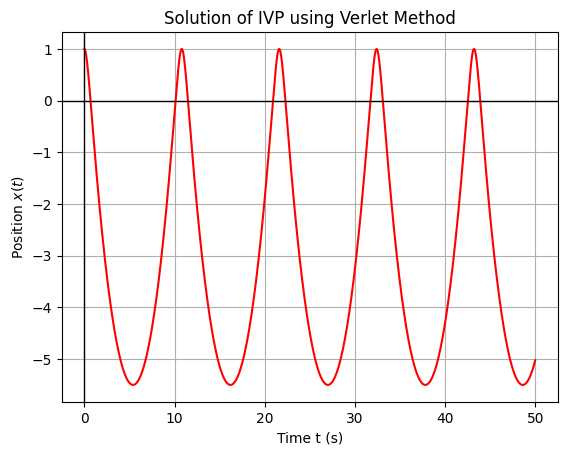

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f_x(t,x,v):
    return v  

def f_v(t,x,v):
    return v**2-(x+5)  

def Verlet(funcs,t0,u0,tn,h):
    T=np.arange(t0,tn+h,h)
    X=np.zeros(len(T))
    V=np.zeros(len(T))
    V_half=np.zeros(len(T))
    X[0],V[0]=u0
    V_half[0]=V[0]+0.5*h*f_v(t0,*u0)  #Initialization of half-step 
    
    for i in range(len(T)-1):
        t=T[i]
        
        #Position update using half-step velocity
        X[i+1]=X[i]+h*f_x(t+h/2,X[i],V_half[i])  
        
        #Velocity update
        V[i+1]=V_half[i]+0.5*h*f_v(t+h,X[i+1],V_half[i])  
        
        #Next half-step velocity update
        V_half[i+1]=V_half[i]+h*f_v(t+h,X[i+1],V[i+1])  
    
    return T,X,V

t0,tn,h=0,50,0.001
x0,v0=1,0

functions=[f_x,f_v]
T,X,V=Verlet(functions,t0,[x0,v0],tn,h)

plt.plot(T,X,'r-')
plt.xlabel('Time t (s)')
plt.ylabel(r'Position $x(t)$')
plt.title('Solution of IVP using Verlet Method')
plt.axhline(color='black',linewidth=1)
plt.axvline(color='black',linewidth=1)
plt.grid()
plt.show()

# Question 2(1)
Planetary Motion using Verlet Method

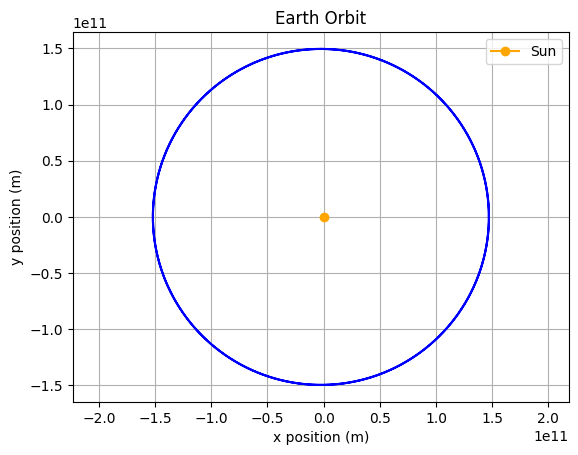

In [3]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67430e-11
M_sun=1.9891e30
GM=G*M_sun

x0,y0=1.4710e11,0
vx0,vy0=0,3.0287e4

def dxdt(t,x,y,vx,vy):
    return vx

def dydt(t,x,y,vx,vy):
    return vy

def dvxdt(t,x,y,vx,vy):
    r=np.sqrt(x**2+y**2)
    return -GM*x/r**3

def dvydt(t,x,y,vx,vy):
    r=np.sqrt(x**2+y**2)
    return -GM*y/r**3

def Verlet(r_funcs,v_funcs,t0,u0,tn,h):
    T=np.arange(t0,tn+h,h)
    X=np.zeros((len(T),2))
    V=np.zeros((len(T),2))
    V_half=np.zeros((len(T),2))
    X[0],V[0]=u0[:2],u0[2:]
    V_half[0]=V[0]+0.5*h*np.array([f(t0,*X[0],*V[0]) for f in v_funcs])
    for i in range(len(T)-1):
        t=T[i]
        X[i+1]=X[i]+h*np.array([f(t+h/2,*X[i],*V_half[i]) for f in r_funcs])
        V[i+1]=V_half[i]+0.5*h*np.array([f(t+h,*X[i+1],*V_half[i]) for f in v_funcs])
        V_half[i+1]=V_half[i]+h*np.array([f(t+h,*X[i+1],*V[i+1]) for f in v_funcs])
    return T,X,V

a=1.496e11
orbital_period=2*np.pi*np.sqrt(a**3/GM)
tn=orbital_period*2
h=3600

r_funcs=[dxdt,dydt]
v_funcs=[dvxdt,dvydt]
T,X,V=Verlet(r_funcs,v_funcs,0,[x0,y0,vx0,vy0],tn,h)

plt.plot(X[:,0],X[:,1],'b-')
plt.plot(0,0,color='orange',marker='o',label="Sun",ms=6)
plt.xlabel('x position (m)')
plt.ylabel('y position (m)')
plt.title('Earth Orbit')
plt.grid()
plt.axis('equal')
plt.legend()
plt.show()

# Question 2(2)
Variation of Energy in planetary orbit in Verlet Method

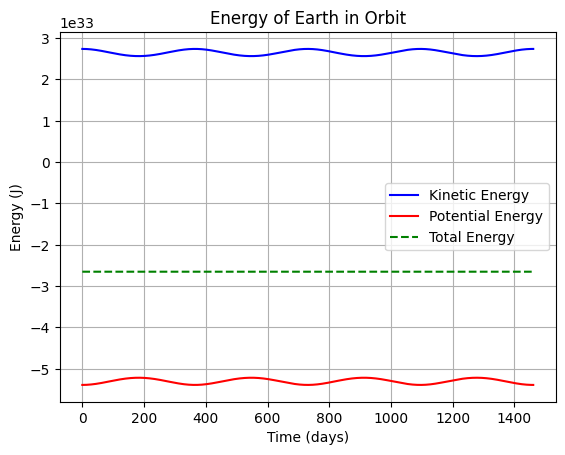

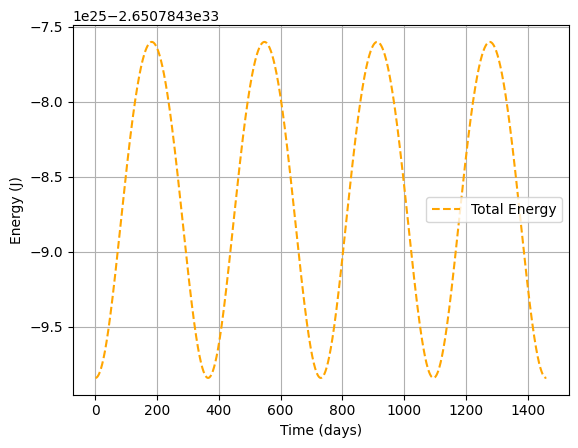

In [1]:
import numpy as np
import matplotlib.pyplot as plt

G=6.67430e-11
M_sun=1.9891e30
m_earth=5.9722e24
GM=G*M_sun

x0,y0=1.4710e11,0
vx0,vy0=0,3.0287e4

def dxdt(t,x,y,vx,vy):return vx
def dydt(t,x,y,vx,vy):return vy
def dvxdt(t,x,y,vx,vy):r=np.sqrt(x**2+y**2);return -GM*x/r**3
def dvydt(t,x,y,vx,vy):r=np.sqrt(x**2+y**2);return -GM*y/r**3

def Verlet(r_funcs,v_funcs,t0,u0,tn,h):
    T=np.arange(t0,tn+h,h)
    X=np.zeros((len(T),2))
    V=np.zeros((len(T),2))
    V_half=np.zeros((len(T),2))
    KE=np.zeros(len(T))
    PE=np.zeros(len(T))
    TE=np.zeros(len(T))
    X[0],V[0]=u0[:2],u0[2:]
    V_half[0]=V[0]+0.5*h*np.array([f(t0,*X[0],*V[0]) for f in v_funcs])
    for i in range(len(T)-1):
        t=T[i]
        X[i+1]=X[i]+h*np.array([f(t+h/2,*X[i],*V_half[i]) for f in r_funcs])
        V[i+1]=V_half[i]+0.5*h*np.array([f(t+h,*X[i+1],*V_half[i]) for f in v_funcs])
        V_half[i+1]=V_half[i]+h*np.array([f(t+h,*X[i+1],*V[i+1]) for f in v_funcs])
        
        r=np.sqrt(X[i+1,0]**2+X[i+1,1]**2)        
        v_sq=V[i+1,0]**2+V[i+1,1]**2
        
        KE[i+1]=0.5*m_earth*v_sq   #Kinetic Energy
        PE[i+1]=-GM*m_earth/r      #Potential Energy
        TE[i+1]=KE[i+1]+PE[i+1]
        
    return T,X,V,KE,PE,TE

a=1.496e11
orbital_period=2*np.pi*np.sqrt(a**3/GM)
tn=4*orbital_period
h=3600

r_funcs=[dxdt,dydt]
v_funcs=[dvxdt,dvydt]
T,X,V,KE,PE,TE=Verlet(r_funcs,v_funcs,0,[x0,y0,vx0,vy0],tn,h)

plt.figure()
plt.plot(T[1:]/(24*3600),KE[1:],label="Kinetic Energy",color="blue")
plt.plot(T[1:]/(24*3600),PE[1:],label="Potential Energy",color="red")
plt.plot(T[1:]/(24*3600),TE[1:],label="Total Energy",color="green",linestyle="dashed")
plt.xlabel("Time (days)")
plt.ylabel("Energy (J)")
plt.title("Energy of Earth in Orbit")
plt.legend()
plt.grid()
plt.show()

plt.figure()
plt.plot(T[1:]/(24*3600),TE[1:],label="Total Energy",color="orange",linestyle="dashed")
plt.xlabel("Time (days)")
plt.ylabel("Energy (J)")
plt.legend()
plt.grid()
plt.show()